In [645]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

In [646]:
train = tf.keras.utils.image_dataset_from_directory(
  'is that santa/train/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=64)

test = tf.keras.utils.image_dataset_from_directory(
  'is that santa/test/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=64)

Found 614 files belonging to 2 classes.
Using 492 files for training.
Found 616 files belonging to 2 classes.
Using 123 files for validation.


In [647]:
class_names = train.class_names
class_names

['not-a-santa', 'santa']

In [648]:
import matplotlib.pyplot as plt
import seaborn as sns

In [649]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

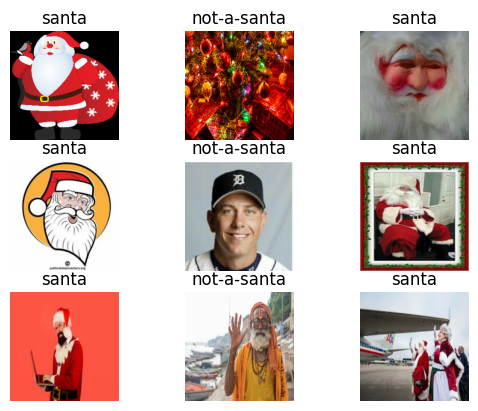

In [650]:
for img, lbl in train:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.title(class_names[lbl[i]])
        plt.axis("off")
        plt.imshow(img[i].numpy().astype('uint8'))

In [651]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [652]:
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))

In [653]:
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
np.min(first_image)

0.024616199

In [654]:
np.max(first_image)

1.0

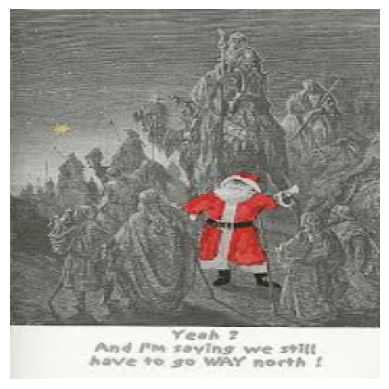

In [655]:
plt.axis('off')
plt.imshow(first_image);

In [656]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

In [657]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [658]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_37 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_52 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 60, 60, 32)      

In [659]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [660]:
hist = model.fit(
    train,
    epochs=6
)

Epoch 1/6


c:\Users\rayga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 5s 415ms/step - loss: 1.0127 - accuracy: 0.5346
Epoch 2/6
8/8 [==============================] - 3s 410ms/step - loss: 0.6048 - accuracy: 0.6728
Epoch 3/6
8/8 [==============================] - 3s 411ms/step - loss: 0.4371 - accuracy: 0.8679
Epoch 4/6
8/8 [==============================] - 3s 412ms/step - loss: 0.2929 - accuracy: 0.8963
Epoch 5/6
8/8 [==============================] - 3s 411ms/step - loss: 0.2405 - accuracy: 0.8943
Epoch 6/6
8/8 [==============================] - 3s 410ms/step - loss: 0.1892 - accuracy: 0.9207


In [661]:
model.evaluate(test)

2/2 [==============================] - 1s 124ms/step - loss: 0.4653 - accuracy: 0.8618


[0.4653216600418091, 0.8617886304855347]

In [662]:
X_test, y_test = test

In [664]:
y_pred = model.predict(test)

2/2 [==============================] - 0s 127ms/step


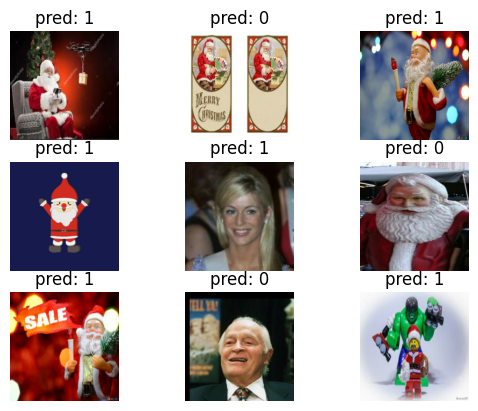

In [670]:
for img, lbl in train:
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.axis("off")
        plt.title(f'pred: {np.argmax(y_pred[i])}')
        plt.imshow(img[i].numpy().astype('uint8'))